## Phladelphia Crime Analysis

When I was in graduate school, i have lived in Philly for 2 years. I lived in University city area, close to 45th street. when i lived there, i always felt hestitated to walk over 45th street where i feel crimes happen pretty frequently. Today, i am going to use this public data to validate my guess.

## Key Takeways

##### Data Analysis
Only 2017, 2018, 2019 data are used for analysis
- Most crimes occur during day time. The volume of crime drops after 3pm
- theft has the highest volume. The next is Vandalism and theft from vehicle. 
- Theft mostly happen in center city area, theft from vehicle mostly happens in museum area and Vandalism uniformly distributed across the city. This is opposite to my feeling, because I always think center city are and meseum area are very nice area. However, i do know museum area has no public transportation which means people always have to drive there and park on the street. This might cause theft

##### Time Series Model - ARMA
- plotted time series data. 
- plotted ACF and chose lag 14 in the model
- residuals are normal distributed with mean 0 and resuduals are no longer autocorrelated
- plotted forecast against actual value. 


In [194]:
import pandas as pd
import matplotlib.pyplot as plt


import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm

import gmaps
import pandasql 

In [195]:
df = pd.read_csv('incidents_part1_part2.csv')

/Users/yucongweng/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [168]:
df.head()

,the_geom,lng,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,the_geom_webmercator,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,hour_
0,0101000020E6100000F8EEE23F15CB52C0EE0F10A3D2F6...,-75.173172,340,1,1,2015-12-17 07:26:00,2015-12-17,07:26:00,0101000020110F0000C5A766CE1BEC5FC141FEBD3CBA85...,201501056051,1800 BLOCK S CHADWICK ST,1400.0,Vandalism/Criminal Mischief,-75.173172,39.928303,39.928303,7.0
1,0101000020E61000007A4F69ED0BCB52C06E9C1C5786F6...,-75.172603,341,1,1,2015-12-17 11:04:00,2015-12-17,11:04:00,0101000020110F0000F89FBBF80BEC5FC1C77C11BD6585...,201501056080,1500 BLOCK MC KEAN ST,1400.0,Vandalism/Criminal Mischief,-75.172603,39.925975,39.925975,11.0
2,0101000020E6100000D3C89D8834CB52C0D5E3A5381AF6...,-75.175081,342,1,1,2015-12-18 22:55:00,2015-12-18,22:55:00,0101000020110F0000A9DC08F250EC5FC160256000EE84...,201501056360,2200 BLOCK S 17TH ST,1400.0,Vandalism/Criminal Mischief,-75.175081,39.922675,39.922675,22.0
3,0101000020E6100000E51F85042FCB52C058F92B853CF6...,-75.174745,343,1,1,2015-12-19 00:54:00,2015-12-19,00:54:00,0101000020110F00008468729347EC5FC1E25B43FC1385...,201501056375,2200 BLOCK S 17TH ST,1400.0,Vandalism/Criminal Mischief,-75.174745,39.923722,39.923722,0.0
4,0101000020E61000007CD13F3D0DCB52C04961410E88F6...,-75.172683,344,1,1,2015-12-20 01:07:00,2015-12-20,01:07:00,0101000020110F00005BFA2F330EEC5FC18DA369A36785...,201501056502,S 16TH ST / MC KEAN ST,1400.0,Vandalism/Criminal Mischief,-75.172683,39.926027,39.926027,1.0


In [3]:
print('there are total %d records'%df.shape[0])
print('there are total %d dimensions'%df.shape[1])

there are total 2702771 records
there are total 17 dimensions


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702771 entries, 0 to 2702770
Data columns (total 17 columns):
the_geom                object
lng                     float64
objectid                int64
dc_dist                 int64
psa                     object
dispatch_date_time      object
dispatch_date           object
dispatch_time           object
the_geom_webmercator    object
dc_key                  int64
location_block          object
ucr_general             float64
text_general_code       object
point_x                 float64
point_y                 float64
lat                     float64
hour_                   float64
dtypes: float64(6), int64(3), object(8)
memory usage: 350.5+ MB


In [6]:
df.isnull().sum()

the_geom                21237
lng                     21237
objectid                    0
dc_dist                     0
psa                         0
dispatch_date_time          0
dispatch_date               0
dispatch_time               0
the_geom_webmercator    21237
dc_key                      0
location_block              0
ucr_general              1685
text_general_code        1685
point_x                 21237
point_y                 21237
lat                     21237
hour_                    3214
dtype: int64

There are missing values are geometry data

#### Data Analysis

In [196]:
# create column year
df['year'] = df['dispatch_date'].str.slice(start = 0, stop = 4).astype(int)

In [197]:
# create column hour
df['hour'] = df['dispatch_time'].str.slice(start=0, stop = 2).astype(int)

In [198]:
df_2019 = df[df['year'] == 2019]

In [199]:
df_2018 = df[df['year'] == 2018]

In [200]:
df_2017 = df[df['year'] == 2017]

In [10]:
print('in 2019, total %d records'%df_2019.shape[0])
print('in 2018, total %d records'%df_2018.shape[0])
print('in 2017, total %d records'%df_2017.shape[0])

in 2019, total 167946 records
in 2018, total 162109 records
in 2017, total 167321 records


In [201]:
df_3years = pd.concat([df_2017, df_2018, df_2019])

In [250]:
q = 'select point_x, point_y, count(objectid) as crime_vol from df_3years group by 1, 2'
df_geo =  pandasql.sqldf(q)

In [186]:
df_geo = df_geo.dropna()

In [187]:
print('the minimum of latitude is %d, the maximum of latitude is %d'%(df.point_x.min(), df.point_x.max()))
print('the minimum of longtitude is %d, the maximum of longtitude is %d'%(df.point_y.min(), df.point_y.max()))

the minimum of latitude is -75, the maximum of latitude is -74
the minimum of longtitude is 39, the maximum of longtitude is 40


In [253]:
df_geo = df_geo.dropna()

In [256]:
locations = df_geo[[ 'point_y', 'point_x']]
weights = df_geo['crime_vol']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

A Jupyter Widget

There are 3 areas having relatively high volume of crime. They are center city area, west Philly after 50st and North-East Philly

In [14]:
type_list = df_2019.groupby('text_general_code').count().objectid.index

In [15]:
type_list = list(type_list)

In [12]:
q2 = 'select hour_, text_general_code, count(objectid) as crime_vol from df_3years group by 1, 2'
df_hour =  pandasql.sqldf(q2)

In [192]:
q3 = 'select hour_,  count(objectid) as crime_vol from df_3years group by 1'
df_hour1 =  pandasql.sqldf(q3)

In [193]:
df_hour1 = df_hour1.set_index('hour_')

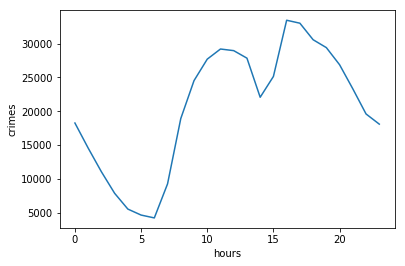

In [194]:
plt.plot(df_hour1.crime_vol)
plt.xlabel('hours')
plt.ylabel('crimes')
plt.show()

most crimes happen during day time and volume drop significantly after 5pm

In [195]:
df_hour = df_hour.set_index('hour_')

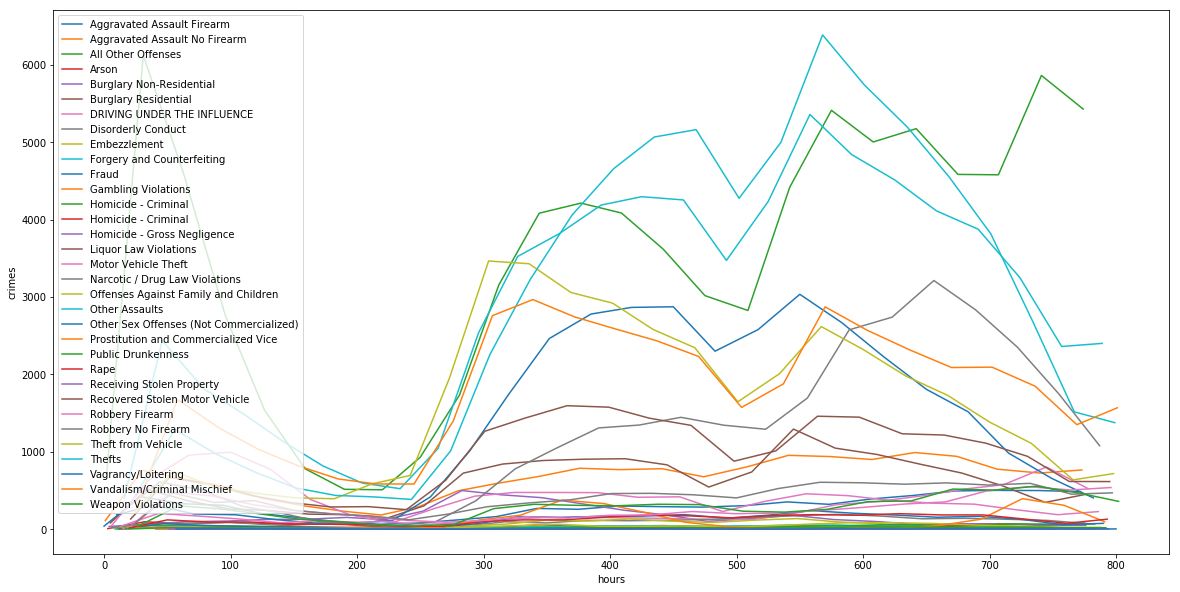

In [16]:
plt.figure(figsize=(20,10))
for c in type_list:
    plt.plot(df_hour[df_hour['text_general_code'] == c].crime_vol, label = c)
plt.legend()
plt.xlabel('hours')
plt.ylabel('crimes')
plt.show()

Interesting, for most types of crimes, the volume go down after 8pm. "All Other Crimes" have the most cases and this go up significantly after evening. 

In [197]:
q4 = 'select text_general_code, count(objectid) as crime_vol from df_3years group by 1'
df_crimeType =  pandasql.sqldf(q4)

In [198]:
df_crimeType = df_crimeType.dropna()

In [199]:
df_crimeType = df_crimeType.set_index('text_general_code')

In [200]:
df_crimeType.sort_values(by = 'crime_vol',ascending=True, inplace=True)

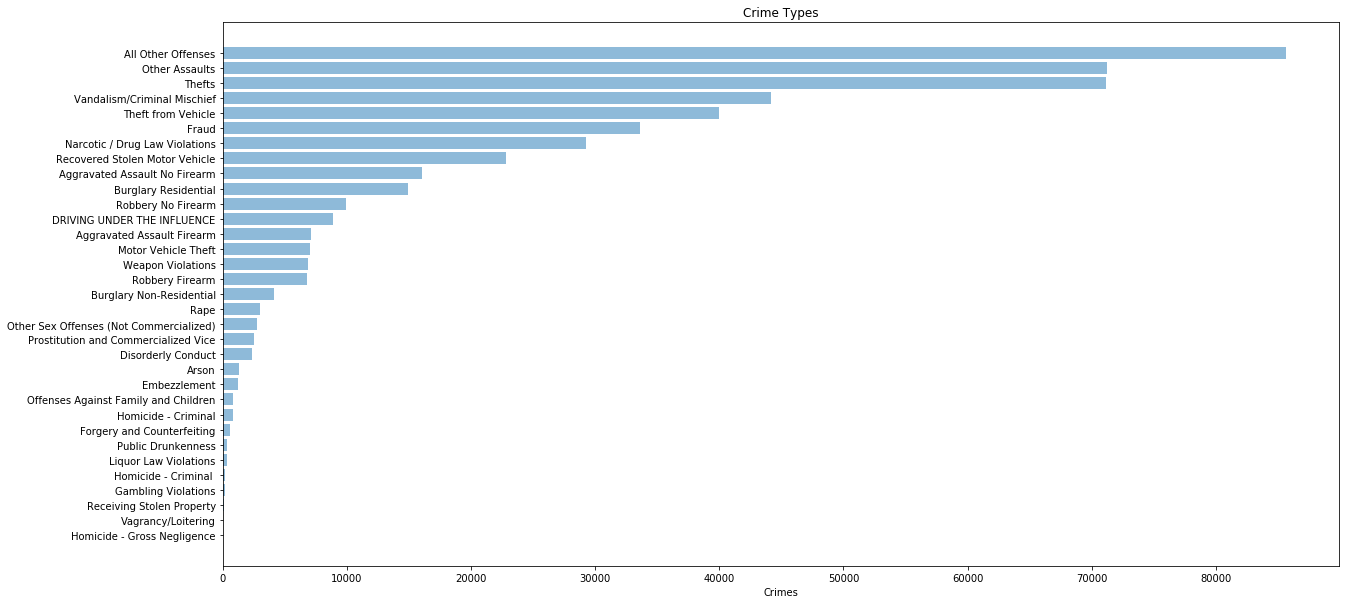

In [201]:
plt.figure(figsize=(20,10))
objects = list(df_crimeType.index)
y_pos = np.arange(len(objects))
performance = list(df_crimeType.crime_vol)

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Crimes')
plt.title('Crime Types')

plt.show()

"All Other Offenses" and "Other Assualts" cannot be identified. Otherwise, theft has the highest volume. The next is Vandalism and theft from vehicle

In [62]:
q6 = 'select point_x, point_y, text_general_code, count(objectid) as crime_vol from df_3years group by 1, 2, 3'
df_geo2 =  pandasql.sqldf(q6)

In [63]:
df_geo2 = df_geo2.dropna()

In [66]:
locations = df_geo2[df_geo2['text_general_code'] == 'Thefts'][[ 'point_y', 'point_x']]
weights = df_geo2[df_geo2['text_general_code'] == 'Thefts']['crime_vol']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

A Jupyter Widget

Theft mainly cluster at center city area

In [67]:
locations = df_geo2[df_geo2['text_general_code'] == 'Vandalism/Criminal Mischief'][[ 'point_y', 'point_x']]
weights = df_geo2[df_geo2['text_general_code'] == 'Vandalism/Criminal Mischief']['crime_vol']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

A Jupyter Widget

Vandalism means someone damages someone else's property. and this distribute very evenly across Philly

In [68]:
locations = df_geo2[df_geo2['text_general_code'] == 'Theft from Vehicle'][[ 'point_y', 'point_x']]
weights = df_geo2[df_geo2['text_general_code'] == 'Theft from Vehicle']['crime_vol']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

A Jupyter Widget

Car stolen mainly happens in museum area

#### ARMA

In [202]:
q7 = 'select dispatch_date,  count(objectid) as crime_vol from df_2019 group by 1 order by 1'
df_time_2019 =  pandasql.sqldf(q7)

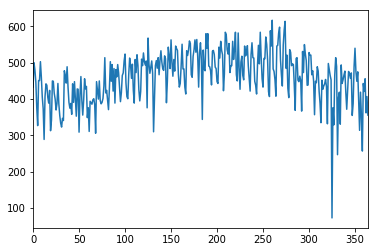

In [20]:
df_time_2019.crime_vol.plot()
plt.show()

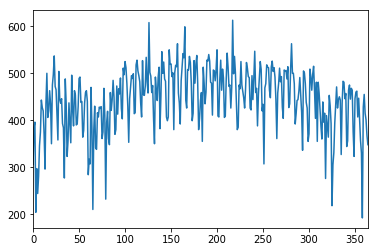

In [21]:
q7 = 'select dispatch_date,  count(objectid) as crime_vol from df_2018 group by 1 order by 1'
df_time_2018 =  pandasql.sqldf(q7)

df_time_2018.crime_vol.plot()
plt.show()

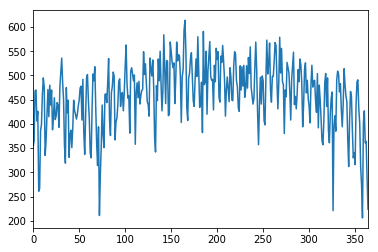

In [22]:
q7 = 'select dispatch_date,  count(objectid) as crime_vol from df_2017 group by 1 order by 1'
df_time_2017 =  pandasql.sqldf(q7)

df_time_2017.crime_vol.plot()
plt.show()

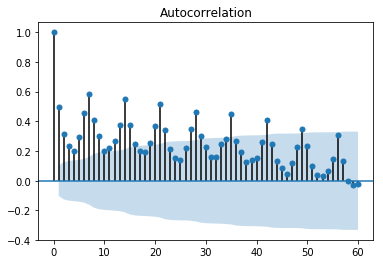

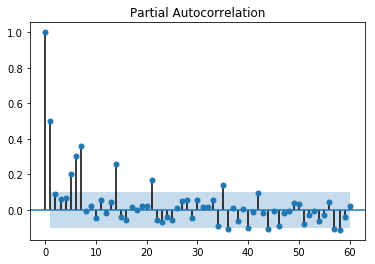

In [23]:
fig =sm.graphics.tsa.plot_acf(df_time_2019.crime_vol.values.squeeze(), lags=60)
fig = sm.graphics.tsa.plot_pacf(df_time_2019.crime_vol.values.squeeze(), lags=60)
plt.show()

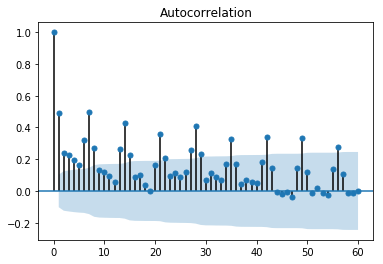

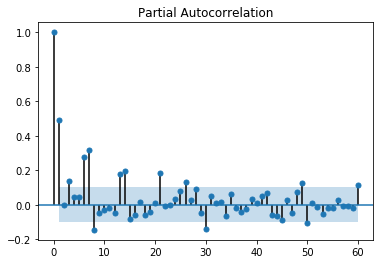

In [24]:
fig =sm.graphics.tsa.plot_acf(df_time_2018.crime_vol.values.squeeze(), lags=60)
fig = sm.graphics.tsa.plot_pacf(df_time_2018.crime_vol.values.squeeze(), lags=60)
plt.show()

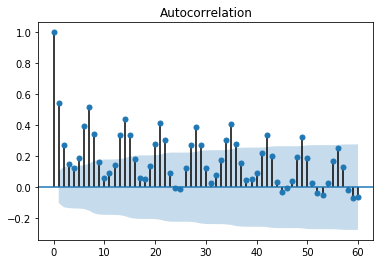

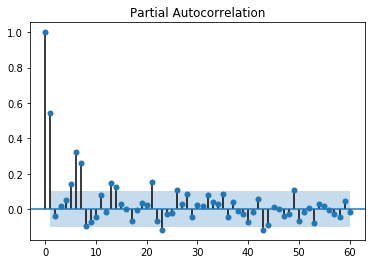

In [25]:
fig =sm.graphics.tsa.plot_acf(df_time_2017.crime_vol.values.squeeze(), lags=60)
fig = sm.graphics.tsa.plot_pacf(df_time_2017.crime_vol.values.squeeze(), lags=60)
plt.show()

There are notable correlation for lag 1 and lag 7 and lag 14

In [206]:
df_time_2019 = df_time_2019.set_index('dispatch_date')

In [207]:
df_time_2019 = df_time_2019.astype(np.float64)

In [226]:
arma_mod1401 = sm.tsa.ARMA(df_time_2019, (14,0, 1)).fit(disp=False)
print('The parameters of the model are: ', arma_mod1501.params)
print('The AIC score is %f32, the BIC score is %f32, The HQIC score is %f32' %(arma_mod1501.aic, arma_mod1501.bic, arma_mod1501.hqic))

The parameters of the model are:  const               444.524754
ar.L1.crime_vol       0.240075
ar.L2.crime_vol       0.018385
ar.L3.crime_vol       0.023802
ar.L4.crime_vol      -0.062936
ar.L5.crime_vol       0.035390
ar.L6.crime_vol       0.145649
ar.L7.crime_vol       0.275683
ar.L8.crime_vol      -0.053992
ar.L9.crime_vol       0.025547
ar.L10.crime_vol     -0.035893
ar.L11.crime_vol      0.064433
ar.L12.crime_vol     -0.026221
ar.L13.crime_vol     -0.012043
ar.L14.crime_vol      0.281220
dtype: float64
The AIC score is 3905.45872032, the BIC score is 3967.85707732, The HQIC score is 3930.25663832


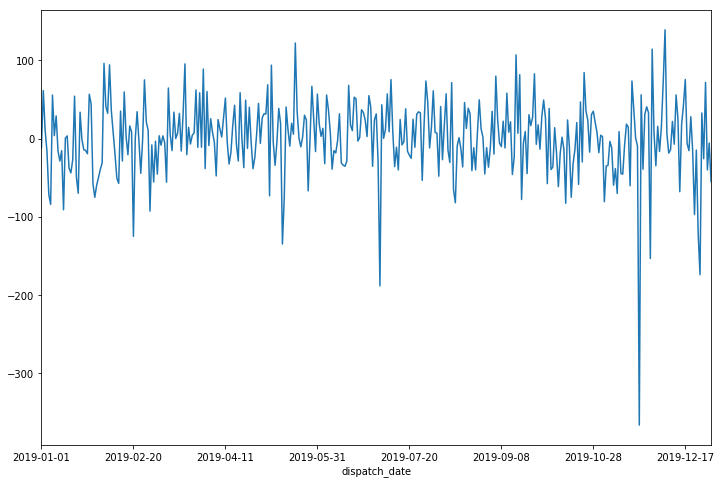

In [227]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod1401.resid.plot(ax=ax)
plt.show()

In [228]:
resid = arma_mod1501.resid

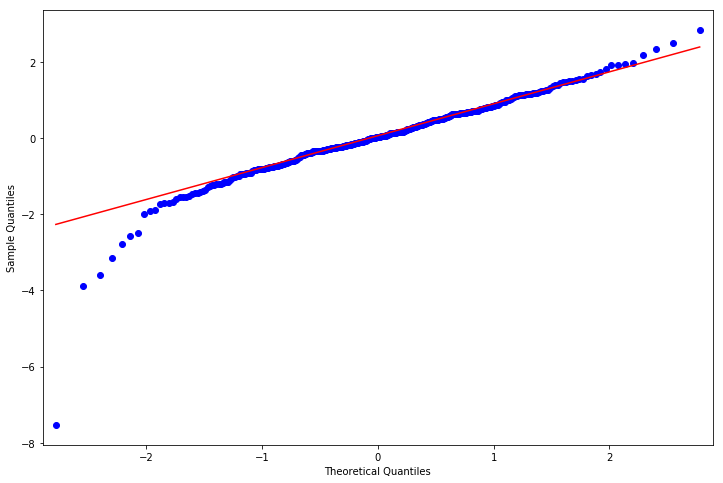

In [229]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
plt.show()

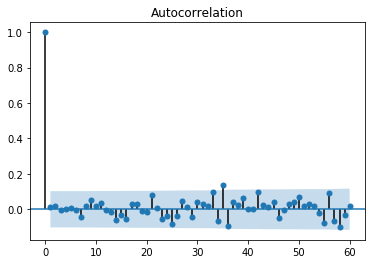

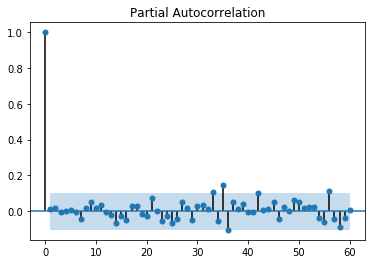

In [232]:
fig =sm.graphics.tsa.plot_acf(resid.squeeze(), lags=60)
fig = sm.graphics.tsa.plot_pacf(resid.squeeze(), lags=60)
plt.show()

#### Predictions

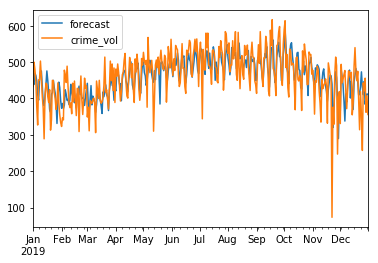

In [249]:
arma_mod1501.plot_predict()